In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition
import sklearn.manifold
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'../data/processed/dataset.csv')

In [3]:
data.columns

Index(['Area', 'Continent', 'Year Code', 'Alcoholic Beverages', 'Animal fats',
       'Apples and products', 'Aquatic Products, Other', 'Bananas',
       'Barley and products', 'Beans', 'Beer', 'Beverages, Alcoholic',
       'Bovine Meat', 'Butter, Ghee', 'Cassava and products', 'Cephalopods',
       'Cereals - Excluding Beer', 'Cereals, Other',
       'Cocoa Beans and products', 'Coconuts - Incl Copra',
       'Coffee and products', 'Crustaceans', 'Demersal Fish', 'Eggs',
       'Fats, Animals, Raw', 'Fish, Seafood', 'Freshwater Fish',
       'Fruits - Excluding Wine', 'Fruits, Other',
       'Grapes and products (excl wine)', 'Groundnuts (Shelled Eq)', 'Honey',
       'Infant food', 'Maize and products', 'Marine Fish, Other', 'Meat',
       'Meat, Other', 'Milk - Excluding Butter', 'Miscellaneous',
       'Molluscs, Other', 'Mutton & Goat Meat', 'Nuts and products', 'Offals',
       'Offals, Edible', 'Oilcrops', 'Oilcrops Oil, Other', 'Oilcrops, Other',
       'Olive Oil', 'Oranges, 

In [4]:
le = sklearn.preprocessing.LabelEncoder()
data['Continent'] = le.fit_transform(data['Continent'])

In [5]:
piciei = sklearn.decomposition.PCA(2)
data_2d_pca = piciei.fit_transform(data[data.columns[2:]])
data_2d_pca = pd.concat([data[['Area','Continent','Year Code']], pd.DataFrame(data_2d_pca)], axis=1)
data_2d_pca.columns = ['Area','Continent','Year Code', 'PC1', 'PC2']

In [29]:
le.transform(['Africa'])[0]

0

C:\Users\ville\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ville\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


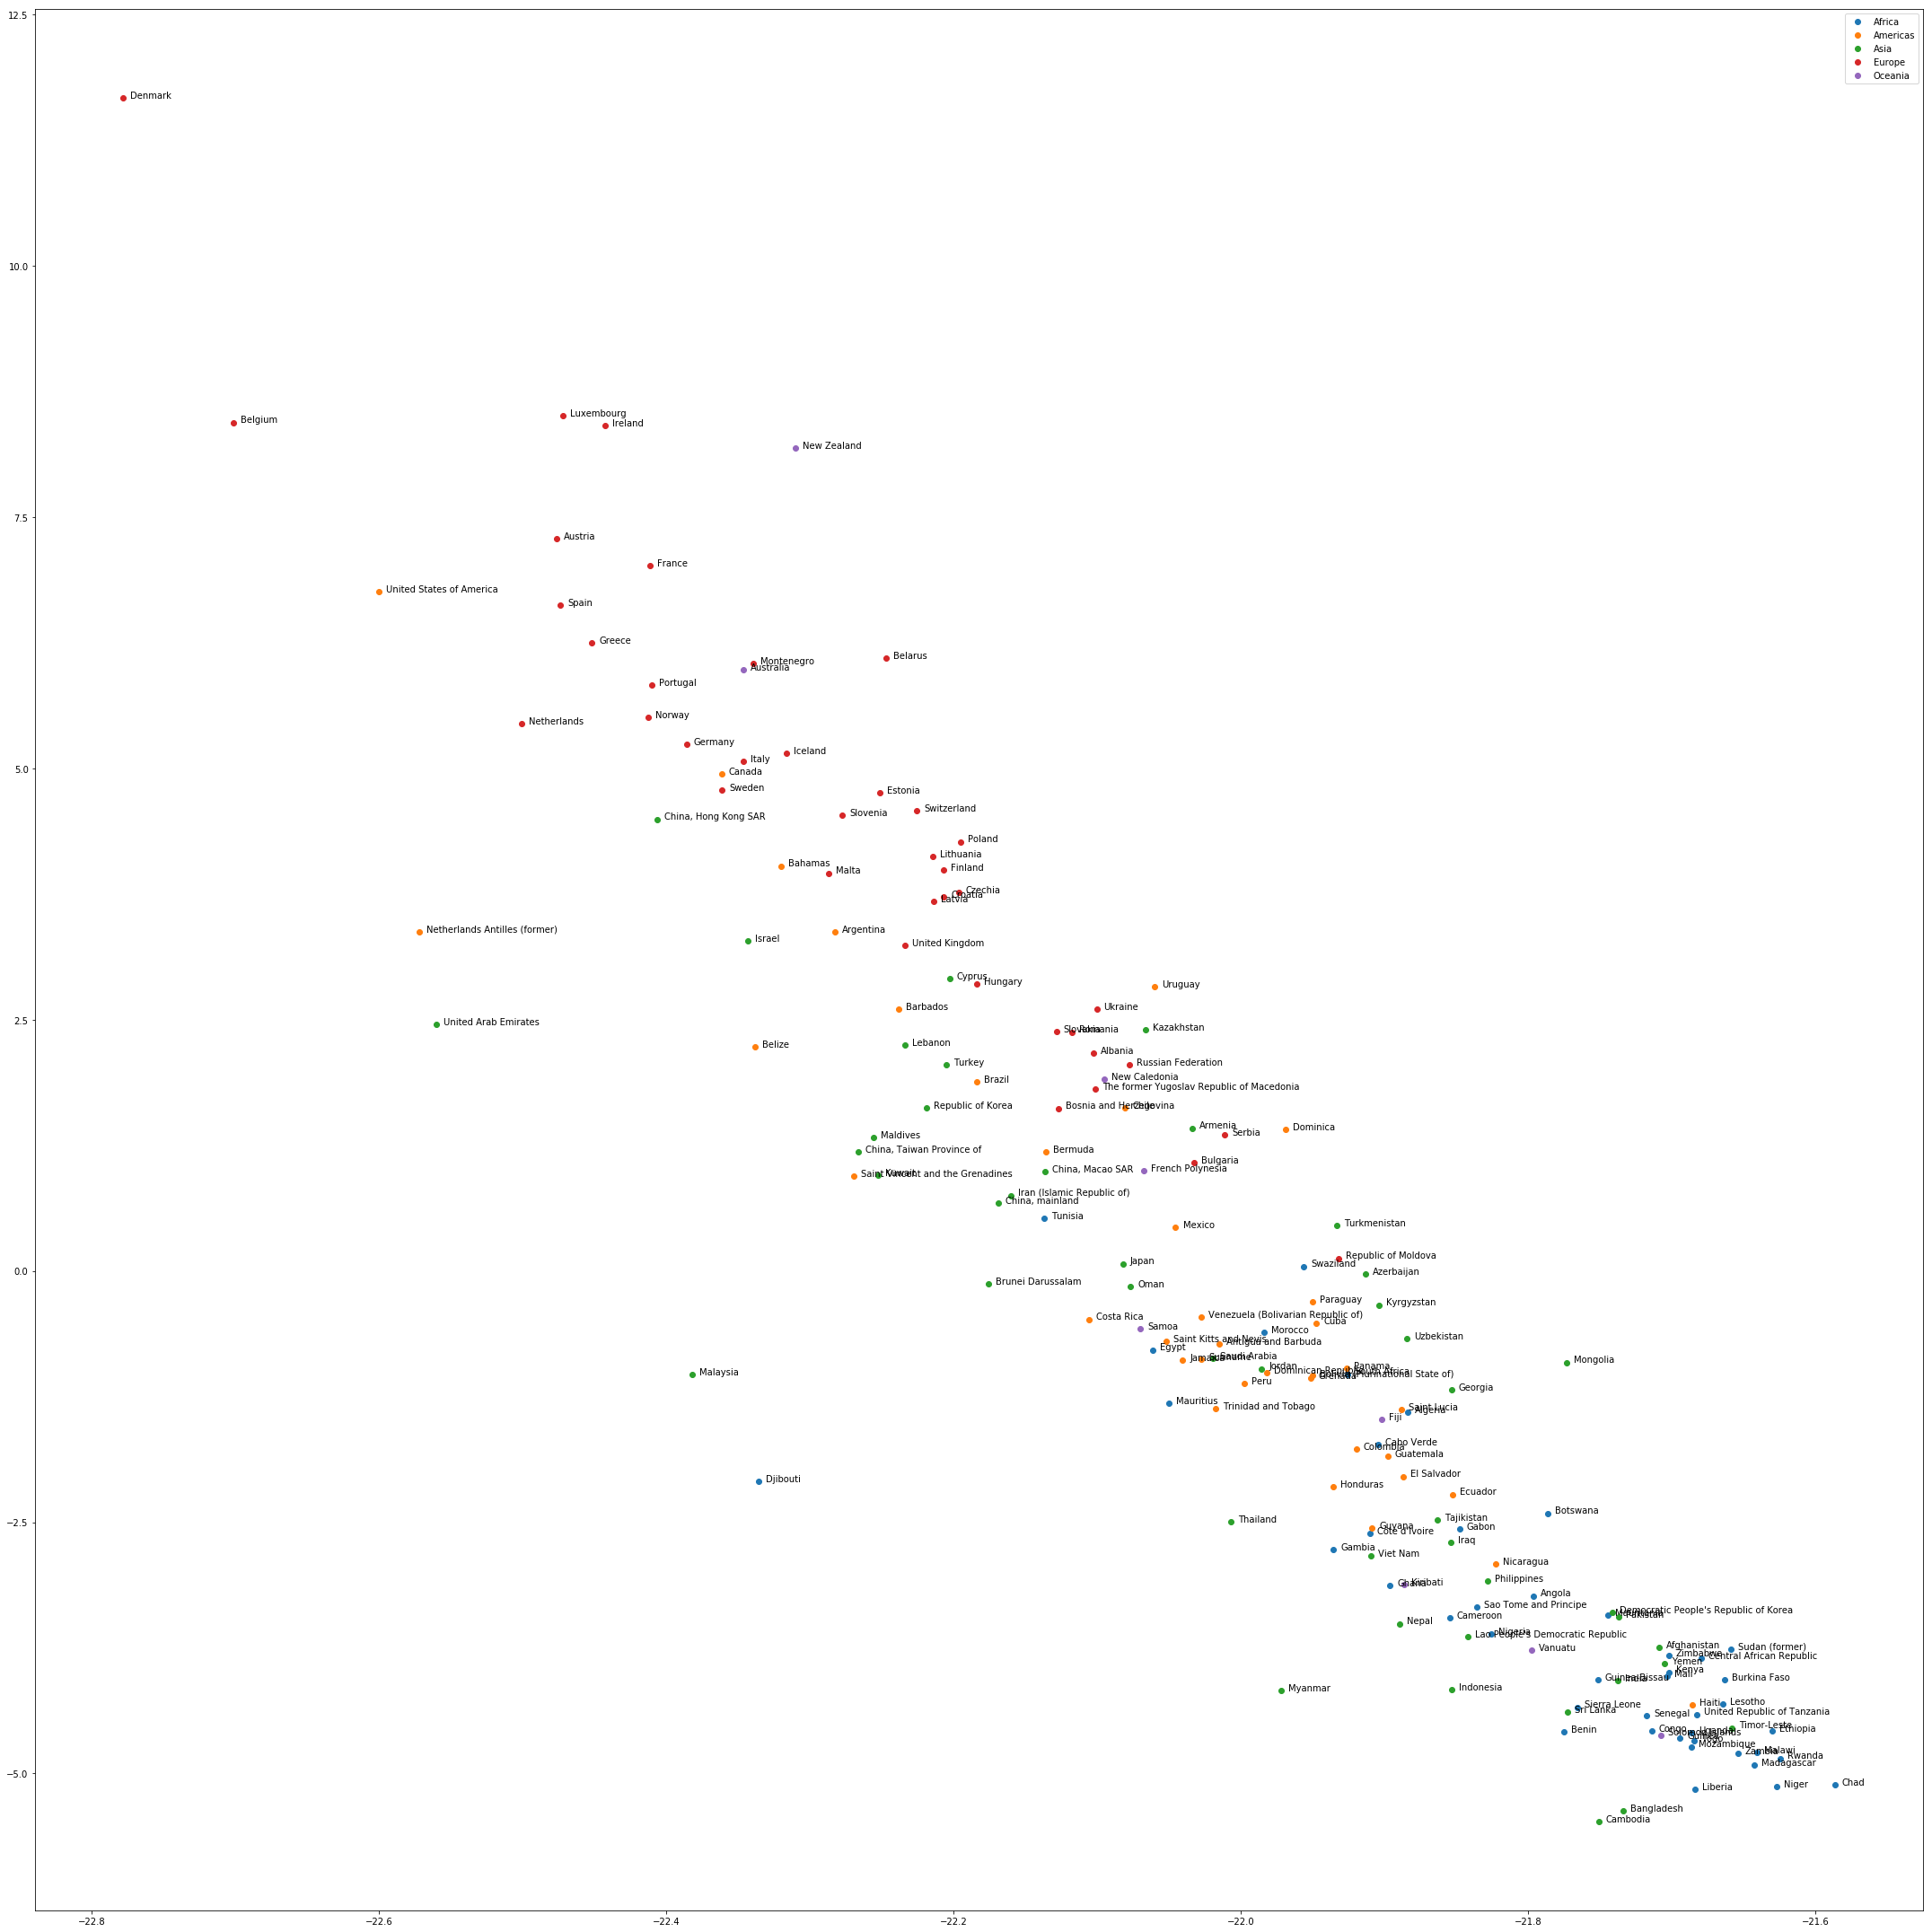

In [32]:
fig, ax = plt.subplots(figsize=(30,30))

for continent in le.classes_:
    ax.scatter(data_2d_pca[data_2d_pca['Year Code'] == 2010][data_2d_pca['Continent'] == le.transform([continent])[0]]['PC1'],
               data_2d_pca[data_2d_pca['Year Code'] == 2010][data_2d_pca['Continent'] == le.transform([continent])[0]]['PC2'],
               label = continent
              )
for key, row in data_2d_pca[data_2d_pca['Year Code'] == 2010].iterrows():
    ax.annotate(row['Area'], xy=(row['PC1']+0.005, row['PC2']))

ax.legend()
fig.tight_layout()
fig.savefig('pca.pdf')

In [33]:
tisni = sklearn.manifold.TSNE(
    verbose = 2,
    random_state = 11
)
data_2d_tsne = tisni.fit_transform(data[data.columns[2:]])
data_2d_tsne = pd.concat([data[['Area','Continent','Year Code']], pd.DataFrame(data_2d_tsne)], axis=1)
data_2d_tsne.columns = ['Area','Continent','Year Code', 'x', 'y']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8351 samples in 0.263s...
[t-SNE] Computed neighbors for 8351 samples in 9.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8351
[t-SNE] Computed conditional probabilities for sample 2000 / 8351
[t-SNE] Computed conditional probabilities for sample 3000 / 8351
[t-SNE] Computed conditional probabilities for sample 4000 / 8351
[t-SNE] Computed conditional probabilities for sample 5000 / 8351
[t-SNE] Computed conditional probabilities for sample 6000 / 8351
[t-SNE] Computed conditional probabilities for sample 7000 / 8351
[t-SNE] Computed conditional probabilities for sample 8000 / 8351
[t-SNE] Computed conditional probabilities for sample 8351 / 8351
[t-SNE] Mean sigma: 2.693656
[t-SNE] Computed conditional probabilities in 0.564s
[t-SNE] Iteration 50: error = 95.2824097, gradient norm = 0.0101151 (50 iterations in 11.019s)
[t-SNE] Iteration 100: error = 83.2960815, gradient norm = 0.0008064 (50 iterations in 1

C:\Users\ville\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ville\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


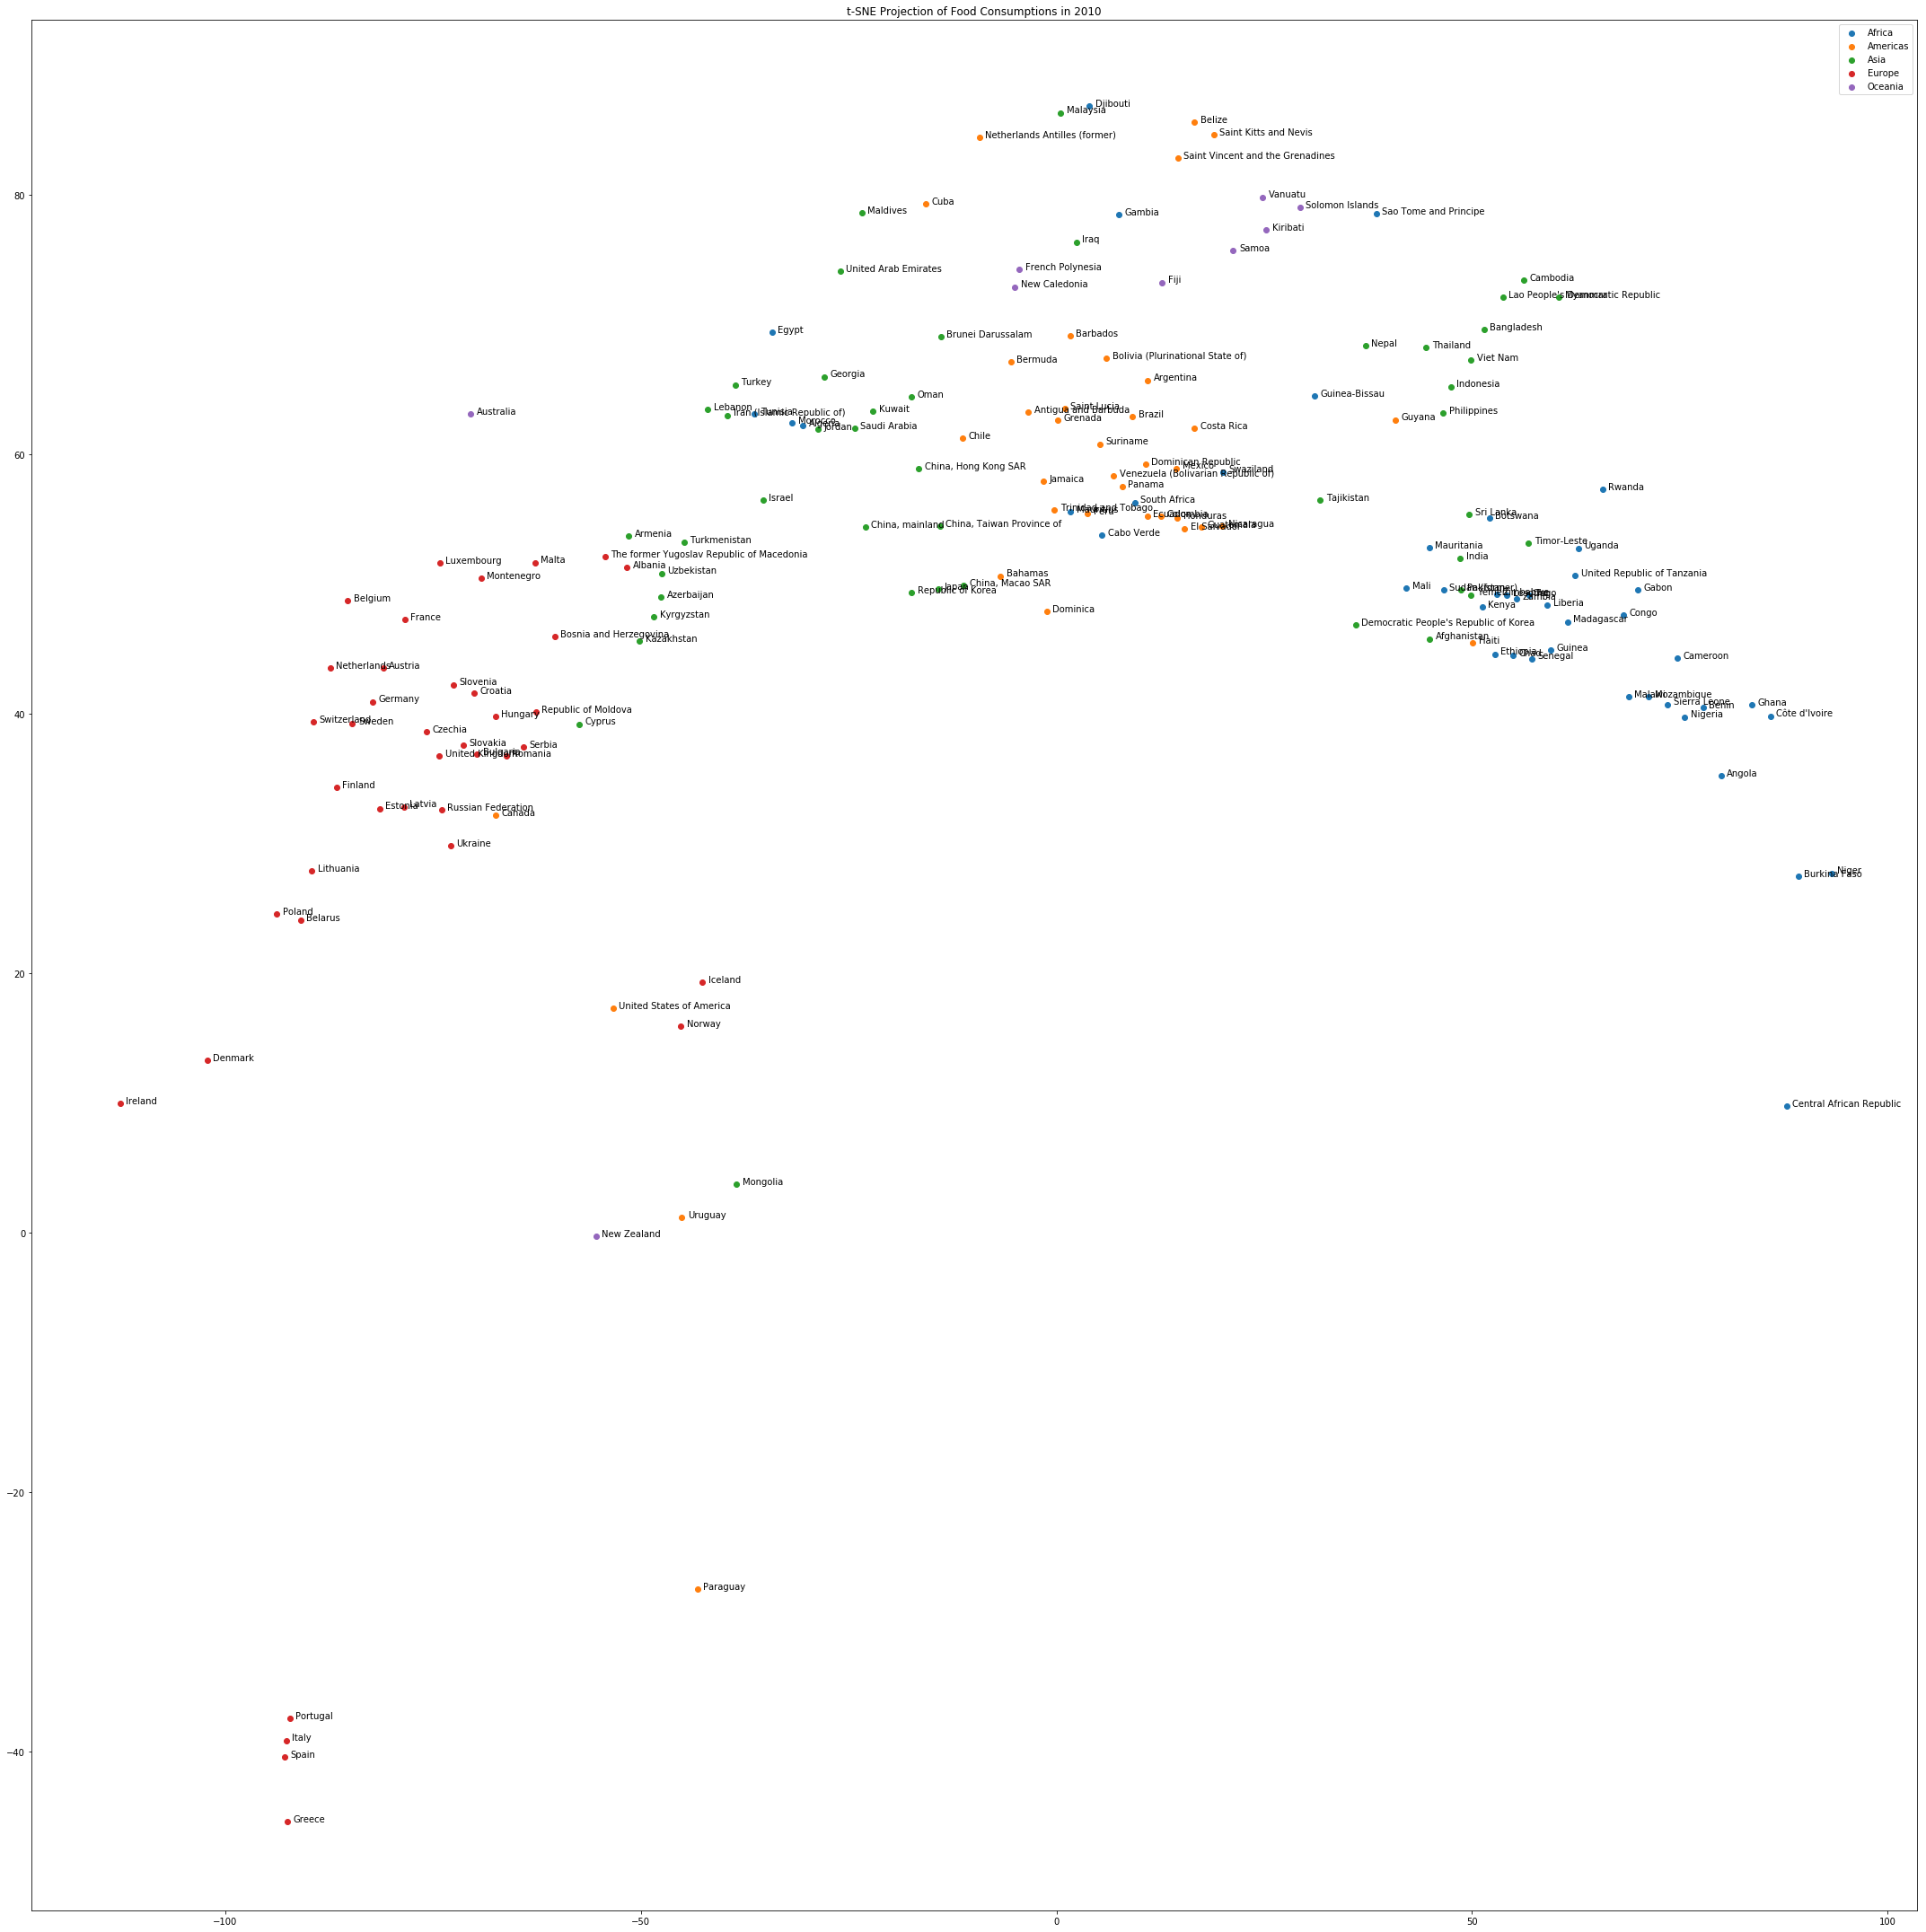

In [84]:
year = 2010

fig, ax = plt.subplots(figsize=(30,30))

for continent in le.classes_:
    ax.scatter(data_2d_tsne[data_2d_tsne['Year Code'] == year][data_2d_tsne['Continent'] == le.transform([continent])[0]]['x'],
               data_2d_tsne[data_2d_tsne['Year Code'] == year][data_2d_tsne['Continent'] == le.transform([continent])[0]]['y'],
               label = continent
              )
for key, row in data_2d_tsne[data_2d_tsne['Year Code'] == year].iterrows():
    ax.annotate(row['Area'], xy=(row['x']+0.7, row['y']))

ax.set_title('t-SNE Projection of Food Consumptions in ' + str(year))
ax.legend()
fig.tight_layout()
fig.savefig('tsne.pdf')

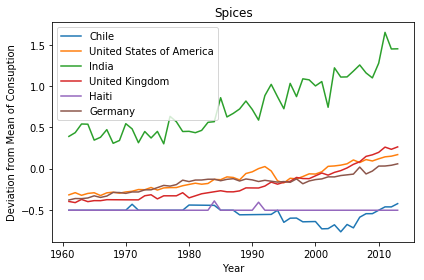

In [87]:
countries = [
    'Chile',
    'United States of America',
    'India',
    'United Kingdom',
    'Haiti',
    'Germany'
]
food = 'Spices'

for country in countries:
    plt.plot(
    data[data.Area == country]['Year Code'],
    data[data.Area == country][food],
    label = country
)
plt.title(food)
plt.xlabel('Year')
plt.ylabel('Deviation from Mean of Consuption')
plt.tight_layout()
plt.legend()
plt.show()